In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# Mean centering
mean = np.mean(train_images, axis=0)
train_images -= mean
test_images -= mean

In [3]:
class_names  = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

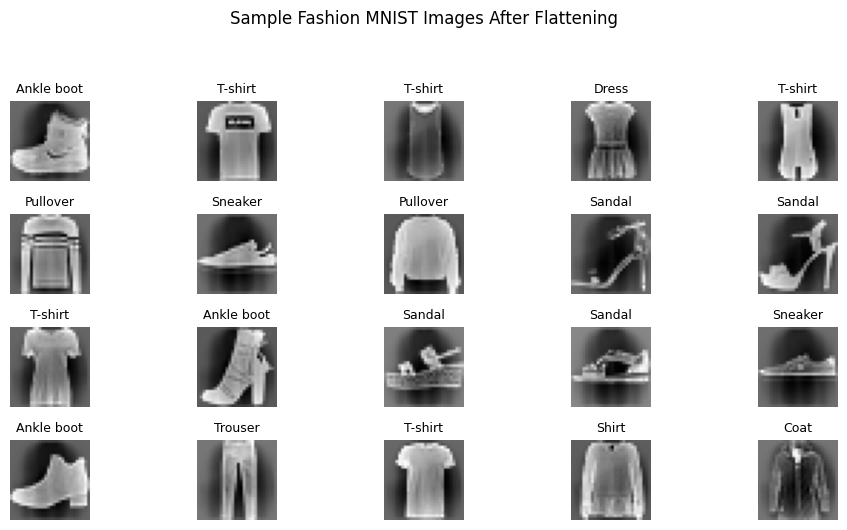

In [4]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]], fontsize=9)
    plt.axis('off')

plt.suptitle('Sample Fashion MNIST Images After Flattening', y=1.05)
plt.tight_layout()
plt.show()

In [5]:
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    x = layers.Dense(units, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([shortcut, x])
    x = layers.ReLU()(x)
    return x

def create_model():
    inputs = tf.keras.Input(shape=(784,))

    # Layer 1
    x = layers.Dense(1024, kernel_regularizer=regularizers.l2(0.0003))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Block 1 (Layers 2-3)
    x = residual_block(x, 1024)

    # Layer 4
    x = layers.Dense(512, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Block 2 (Layers 5-6)
    x = residual_block(x, 512)

    # Layer 7
    x = layers.Dense(384, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Block 3 (Layers 8-9)
    x = residual_block(x, 384)

    # Layer 10
    x = layers.Dense(256, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Block 4 (Layers 11-12)
    x = residual_block(x, 256)

    x = layers.Dense(128, kernel_regularizer=regularizers.l2(0.0003))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    outputs = layers.Dense(10, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

In [6]:
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,  
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5, 
    verbose=1
)

history = model.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_schedule],
    verbose=2
)

Epoch 1/100
750/750 - 49s - 65ms/step - accuracy: 0.7911 - loss: 2.3648 - val_accuracy: 0.8267 - val_loss: 1.8286 - learning_rate: 1.0000e-03
Epoch 2/100
750/750 - 42s - 57ms/step - accuracy: 0.8352 - loss: 1.4515 - val_accuracy: 0.8429 - val_loss: 1.1091 - learning_rate: 1.0000e-03
Epoch 3/100
750/750 - 44s - 59ms/step - accuracy: 0.8351 - loss: 0.9637 - val_accuracy: 0.8227 - val_loss: 0.8753 - learning_rate: 1.0000e-03
Epoch 4/100
750/750 - 47s - 62ms/step - accuracy: 0.8398 - loss: 0.7494 - val_accuracy: 0.8332 - val_loss: 0.6977 - learning_rate: 1.0000e-03
Epoch 5/100
750/750 - 47s - 63ms/step - accuracy: 0.8395 - loss: 0.6898 - val_accuracy: 0.8513 - val_loss: 0.6490 - learning_rate: 1.0000e-03
Epoch 6/100
750/750 - 46s - 61ms/step - accuracy: 0.8447 - loss: 0.6505 - val_accuracy: 0.8582 - val_loss: 0.6108 - learning_rate: 1.0000e-03
Epoch 7/100
750/750 - 48s - 64ms/step - accuracy: 0.8514 - loss: 0.6162 - val_accuracy: 0.8490 - val_loss: 0.6192 - learning_rate: 1.0000e-03
Epoch 

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.8921 - loss: 0.4341
Test accuracy: 0.8920999765396118


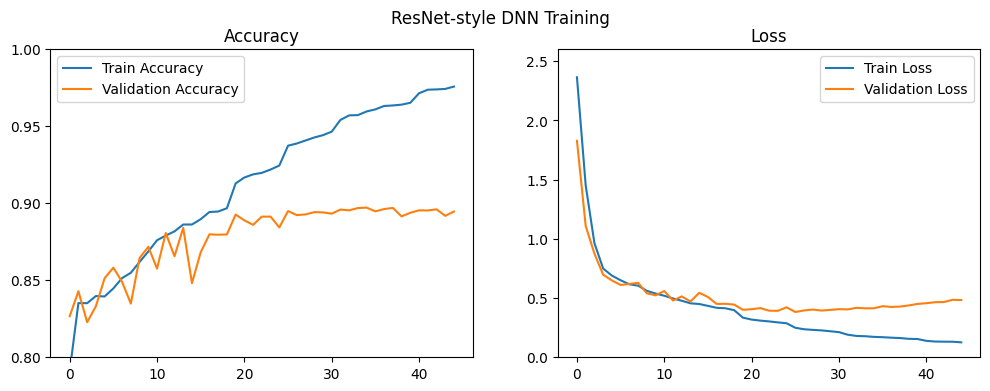

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.ylim(0.80, 1.00)
    plt.yticks(np.arange(0.80, 1.01, 0.05))  # Custom tick spacing: 0.80, 0.85, ...
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    max_loss = max(max(history.history["loss"]), max(history.history["val_loss"]))
    plt.ylim(0.0, max_loss * 1.1)
    plt.legend()

    plt.show()

# Use it as usual
plot_history(history, "ResNet-style DNN Training")


Observations and Summary

| Component               | Configuration                            |
| ----------------------- | ---------------------------------------- |
| **Input Shape**         | (784,)                                   |
| **Optimizer**           | Adam (learning rate = 0.001)             |
| **Loss Function**       | Sparse Categorical Crossentropy          |
| **Epochs**              | Up to 100 (EarlyStopping at 45 epochs)   |
| **Dropout Rates**       | 0.3 inside residuals                     |
| **Regularization**      | L2 (λ = 0.0003) on all Dense layers      |
| **Activation**          | ReLU (internal), Softmax (output layer)  |
| **Batch Normalization** | After every Dense layer                  |
| **Output Layer**        | Dense (10, softmax)                      |


Model Performance Summary
Strong Learning Curve:

->Reaches 85%+ accuracy within first 10–12 epochs.

->Final training accuracy exceeds 97%.

Moderate Generalization Gap:

->Validation accuracy saturates near 91% after ~20 epochs.

->Slight overfitting detected as training accuracy continues rising while validation stabilizes.

Final Test Accuracy:

->Achieves a strong generalization result of 89.2% on unseen test data.
